In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Molecular-data.csv')
input_feature = data['Molar volume'].values.tolist()
input_feature[:10]

[26.37929429,
 25.84796945,
 26.51048435,
 25.73756958,
 25.40264153,
 24.93196838,
 26.61229113,
 26.69430127,
 26.43463899,
 26.49528048]

In [3]:
true_label = data['Density'].values.tolist()
true_label[:10]

[5.254,
 5.362,
 5.228,
 5.385,
 5.456,
 5.559,
 5.207999999999999,
 5.192,
 5.242999999999999,
 5.231]

In [4]:
# Separate out the features and labels into training and test sets
training_size = int(len(input_feature) * 0.8)

training_features = input_feature[0:training_size]
testing_features = input_feature[training_size:]
training_labels = true_label[0:training_size]
testing_labels = true_label[training_size:]

print('The training features size: ', len(training_features))
print('The testing features size: ', len(testing_features))
print('The training labels size: ', len(training_labels))
print('The testing labels size: ', len(testing_labels))

The training features size:  40
The testing features size:  10
The training labels size:  40
The testing labels size:  10


In [13]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(features, label, b, m):
    totalError = 0
    for i in range(0, len(features)):
        x = features[i]
        y = label[i]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(features))

def step_gradient(features, label, b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = features[i]
        y = label[i]
        # Using power rule to do partial derivative.
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, label, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(points, label, b, m, np.array(points), learning_rate)
    return [b, m]

def run(input_data, input_label, num_epoch):
    points = input_data
    label = input_label
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_epoch
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(points, label, initial_b, initial_m)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points,label, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(points, label, b, m)))

    return m, b

In [14]:
weights,bias = run(training_features, training_labels, 1000000)

Starting gradient descent at b = 0, m = 0, error = 28.8106292
Running...
After 1000000 iterations b = 10.137443283384231, m = -0.17952800569292804, error = 0.012041651559490921


In [15]:
print('the m is: ',weights)
print('the b is:', bias)

the m is:  -0.17952800569292804
the b is: 10.137443283384231


In [16]:
predict_y = np.dot(input_feature, weights) + bias
predict_y

array([5.40162119, 5.49700888, 5.3780689 , 5.51682875, 5.57695771,
       5.66145672, 5.35979173, 5.34506861, 5.39168526, 5.38079842,
       5.58270656, 5.64571995, 5.48650918, 4.642903  , 5.55302327,
       5.72861038, 4.98288677, 5.33935003, 5.47623655, 5.22200536,
       5.3930752 , 5.41827423, 5.41481442, 5.44235162, 5.30317254,
       5.49145283, 5.33112673, 5.30951316, 5.39656692, 5.01688226,
       5.33726198, 4.91860817, 5.36262274, 5.16420041, 6.04803933,
       5.16985611, 5.22755382, 5.28931344, 4.78539306, 5.42952341,
       5.46750867, 5.16239814, 5.27317666, 5.59795822, 5.09938717,
       5.15961048, 5.06100198, 5.44200339, 5.15775031, 5.33020721])

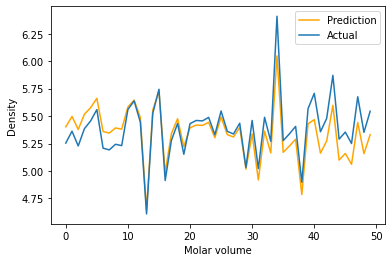

In [17]:
plt.plot(predict_y, color='orange', label='Prediction')
plt.plot(true_label, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [18]:
def plot_density(x, y):
  plt.scatter(input_feature, true_label, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

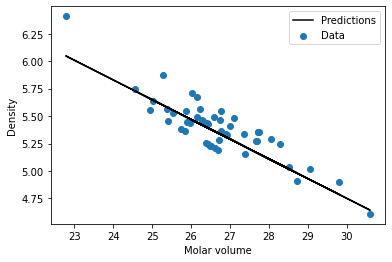

In [19]:
plot_density(input_feature,predict_y)

In [20]:
predict_test = np.dot(testing_features, weights) + bias
predict_test

array([5.46750867, 5.16239814, 5.27317666, 5.59795822, 5.09938717,
       5.15961048, 5.06100198, 5.44200339, 5.15775031, 5.33020721])

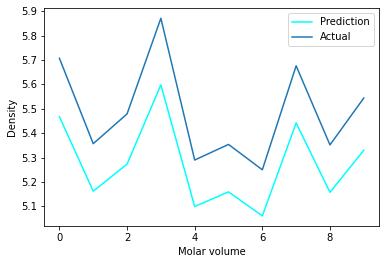

In [22]:
actual_test_trend=testing_labels
plt.plot(predict_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [25]:
differences = (1 - sum(abs(predict_test - actual_test_trend))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

78.7100224604288